In [1]:
 ####!/usr/bin/python
##### coding: utf-8

In [2]:
#Action Plan

#1- Create Database
#
#2- Check and Upload Data to BBDD



In [3]:
# Imports
import pandas as pd
import psycopg2, psycopg2.extras
import psycopg2.extensions
import sys
psycopg2.extensions.register_type(psycopg2.extensions.UNICODE) 
psycopg2.extensions.register_type(psycopg2.extensions.UNICODEARRAY)


# <p style="text-align: center;">DATABASE SCHEMA</p>

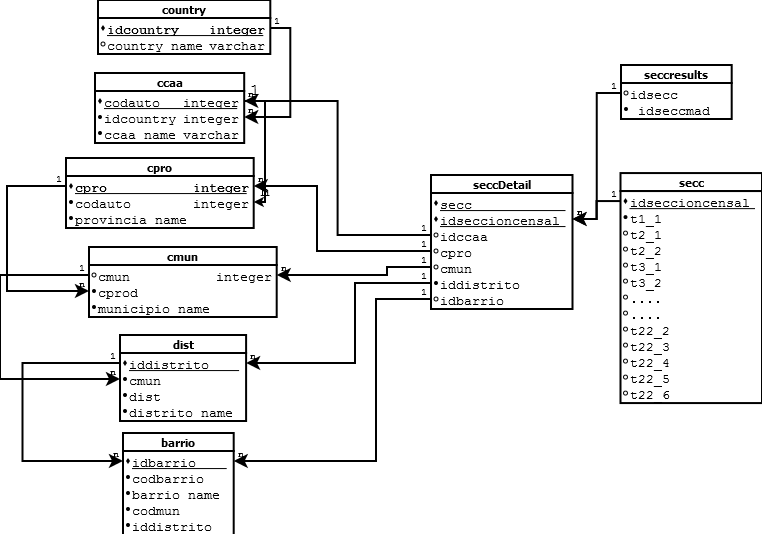

In [1]:
# Create Database
from IPython.display import Image
Image("./data/cityData1.png")
#![title] ("./data/cityData1.png")

In [5]:

#Connect to database
conn = psycopg2.connect(database='cityData', host='localhost',user = 'postgres', password="DS17")
cur = conn.cursor()    


In [9]:

# Create Tables

cur.execute("CREATE TABLE country (idcountry INTEGER  PRIMARY KEY, countryname VARCHAR) ")
cur.execute("CREATE TABLE ccaa (idccaa INTEGER  PRIMARY KEY, idcountry INTEGER REFERENCES country(idcountry) , ccaaname VARCHAR) ")
cur.execute("CREATE TABLE cpro (cpro INTEGER  PRIMARY KEY, idccaa INTEGER REFERENCES ccaa(idccaa) , provname VARCHAR) ")
cur.execute("CREATE TABLE cmun (codmun INTEGER  PRIMARY KEY, cpro INTEGER  REFERENCES cpro(cpro),cmun INTEGER, munname VARCHAR) ")
cur.execute("CREATE TABLE dist (iddist INTEGER  PRIMARY KEY,dist INTEGER,  codmun INTEGER  , distname VARCHAR) ")
cur.execute("CREATE TABLE barrio (idbarrio INTEGER  PRIMARY KEY, dist INTEGER REFERENCES dist(iddist),barrioname VARCHAR) ")
cur.execute("CREATE TABLE seccdetail (idsecc  BIGINT  PRIMARY KEY,secc INTEGER , idccaa INTEGER REFERENCES ccaa(idccaa),idcpro INTEGER REFERENCES cpro(cpro), codmun INTEGER , iddist INTEGER, idbarrio INTEGER REFERENCES barrio(idbarrio) )")
cur.execute("CREATE TABLE secc (idsecc BIGINT  PRIMARY KEY , t1_1 INTEGER, t2_1 INTEGER, t2_2 INTEGER, t3_1 INTEGER, t3_2 INTEGER, t3_3 INTEGER, t4_1 INTEGER, t4_2 INTEGER, t4_3 INTEGER, t4_4 INTEGER, t4_5 INTEGER, t4_6 INTEGER, t4_7 INTEGER, t4_8 INTEGER, t5_1 INTEGER, t5_2 INTEGER, t5_3 INTEGER, t5_4 INTEGER, t5_5 INTEGER, t5_6 INTEGER, t5_7 INTEGER, t5_8 INTEGER, t5_9 INTEGER, t5_10 INTEGER, t5_11 INTEGER, t5_12 INTEGER, t5_13 INTEGER, t5_14 INTEGER, t5_15 INTEGER, t5_16 INTEGER, t6_1 INTEGER, t6_2 INTEGER, t7_1 INTEGER, t7_2 INTEGER, t7_3 INTEGER, t7_4 INTEGER, t7_5 INTEGER, t7_6 INTEGER, t8_1 INTEGER, t8_2 INTEGER, t8_3 INTEGER, t8_4 INTEGER, t9_1 INTEGER, t9_2 INTEGER, t9_3 INTEGER, t9_4 INTEGER, t9_5 INTEGER, t9_6 INTEGER, t10_1 INTEGER, t10_2 INTEGER, t10_3 INTEGER, t10_4 INTEGER, t10_5 INTEGER, t11_1 INTEGER, t11_2 INTEGER, t11_3 INTEGER, t11_4 INTEGER, t11_5 INTEGER, t11_6 INTEGER, t11_7 INTEGER, t11_8 INTEGER, t11_9 INTEGER, t11_10 INTEGER, t11_11 INTEGER, t11_12 INTEGER, t11_13 INTEGER, t11_14 INTEGER, t11_15 INTEGER, t12_1 INTEGER, t12_2 INTEGER, t12_3 INTEGER, t12_4 INTEGER, t12_5 INTEGER, t12_6 INTEGER, t13_1 INTEGER, t13_2 INTEGER, t13_3 INTEGER, t13_4 INTEGER, t13_5 INTEGER, t13_6 INTEGER, t13_7 INTEGER, t13_8 INTEGER, t13_9 INTEGER, t13_10 INTEGER, t13_11 INTEGER, t13_12 INTEGER, t14_1 INTEGER, t14_2 INTEGER, t14_3 INTEGER, t14_4 INTEGER, t14_5 INTEGER, t14_6 INTEGER,t14_7 INTEGER,t14_8 INTEGER,t14_9 INTEGER,t14_10 INTEGER, t14_11 INTEGER, t14_12 INTEGER, t15_2 INTEGER,t15_3 INTEGER,t15_5 INTEGER,t15_6 INTEGER,t15_8 INTEGER,t15_9 INTEGER,t15_11 INTEGER,t15_12 INTEGER,t15_14 INTEGER,t15_15 INTEGER,t15_16 INTEGER,t16_1 INTEGER, t17_1 INTEGER, t17_2 INTEGER,t17_3 INTEGER,t18_1 INTEGER,t18_2 INTEGER,t18_3 INTEGER,t18_4 INTEGER,t18_5 INTEGER,t18_6 INTEGER, t19_1 INTEGER,t19_2 INTEGER,t19_3 INTEGER,t19_4 INTEGER,t19_5 INTEGER,t19_6 INTEGER,t19_7 INTEGER,t19_8 INTEGER,t19_9 INTEGER,t19_10 INTEGER,t20_1 INTEGER,t20_2 INTEGER,t20_3 INTEGER,t20_4 INTEGER,t20_5 INTEGER,t20_6 INTEGER,t20_7 INTEGER,t20_8 INTEGER,t20_9 INTEGER,t21_1 INTEGER,t22_1 INTEGER,t22_2 INTEGER,t22_3 INTEGER,t22_4 INTEGER,t22_5 INTEGER,t22_6 INTEGER) ")

#Send Commit
conn.commit()


In [10]:
%%time
#Country Table

#Insert unique value in country table
cur.execute("INSERT INTO country VALUES ('1','Spain')") 
conn.commit()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 50.7 ms


In [11]:
%%time
#Ccaa Table

#Get Data
url = './data/csv/codccaa.csv'
codccaa=pd.read_csv(url, sep= ';',header = 0)

#Prepare data
codccaa = codccaa.set_index(['idcountry'])
 
#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(codccaa)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=codccaa.to_records().tolist()
rw= ', ?'*(len(codccaa)-1)+';'
q = """INSERT INTO ccaa (idcountry,idccaa,ccaaname) VALUES ?""" +rw 

#test SQL
#check_sql_string(q,a)

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 43.5 ms


In [12]:
%%time
#Cpro Table

#Get Data
url = './data/csv/ccaaprov.csv'
codpro=pd.read_csv(url, sep= ';',header = 0)

#Prepare data and SQL string

codpro = codpro.set_index(['idccaa'])
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(codpro)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=codpro.to_records().tolist()
rw= ', ?'*(len(codpro)-1)+';'
q = """INSERT INTO cpro (idccaa,cpro, provname) VALUES ?""" +rw 

#test SQL
#check_sql_string(q,a)

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 45.5 ms


In [13]:
%%time

#Cmun Table

#Get Data
url = './data/csv/17codmun.csv'
codmun=pd.read_csv(url, sep= ';',header = 0)

#Prepare data and SQL string
codmun = codmun.set_index(['cpro'])
#codmun = codmun[:500] For test only

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(codmun)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=codmun.to_records().tolist()
rw= ', ?'*(len(codmun)-1)+';'
q = """INSERT INTO cmun (cpro ,codmun , cmun , munname) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 10min 35s, sys: 14min 2s, total: 24min 37s
Wall time: 24min 45s


In [27]:
%%time

#Dist Table

#Get Data
url = './data/csv/C2011_distID.csv'
dist=pd.read_csv(url, sep= ';',header = 0)

#Prepare data and SQL string
dist = dist.set_index(['cmun']).fillna(0)

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(dist)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=dist.to_records().tolist()
rw= ', ?'*(len(dist)-1)+';'
q = """INSERT INTO dist (codmun , dist ,iddist, distname) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 22min 27s, sys: 30min 3s, total: 52min 30s
Wall time: 52min 46s


In [74]:
%%time

#Seccdetail Table

#Get Data
#Divided into four parts to avoid memory problems
url = './data/csv/C2011_IndicadoresIDdetail.csv'
detsecc=pd.read_csv(url, sep= ';',header = 0)

#Prepare data and SQL string
detsecc = detsecc.set_index(['idsecc'])
detsecc= detsecc[:10000] 


def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(detsecc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=detsecc.to_records().tolist()
rw= ', ?'*(len(detsecc)-1)+';'
q = """INSERT INTO seccdetail (idsecc , idccaa ,idcpro , codmun , iddist,secc ) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 19min 18s, sys: 25min 43s, total: 45min 2s
Wall time: 45min 15s


In [87]:
%%time

#Seccdetail Table II

#Get Data
url = './data/csv/C2011_IndicadoresIDdetail.csv'
detsecc=pd.read_csv(url, sep= ';',header = 0)
detsecc = detsecc.set_index(['idsecc'])
detsecc= detsecc[10000:20000] 
#detsecc.head()

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(detsecc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=detsecc.to_records().tolist()
rw= ', ?'*(len(detsecc)-1)+';'
q = """INSERT INTO seccdetail (idsecc , idccaa ,idcpro , codmun , iddist,secc ) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 19min 59s, sys: 27min 39s, total: 47min 38s
Wall time: 47min 56s


In [101]:
%%time

#Seccdetail Table III

#Get Data
url = './data/csv/C2011_IndicadoresIDdetail01.csv'
detsecc=pd.read_csv(url, sep= ';',header = 0)
detsecc = detsecc.set_index(['idsecc'])
detsecc= detsecc[20000:30000] 

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(detsecc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=detsecc.to_records().tolist()
rw= ', ?'*(len(detsecc)-1)+';'
q = """INSERT INTO seccdetail (idsecc , idccaa ,idcpro , codmun , iddist,secc ) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 19min 46s, sys: 26min 53s, total: 46min 40s
Wall time: 46min 56s


In [103]:
%%time

#Seccdetail Table IV

#Get Data
url = './data/csv/C2011_IndicadoresIDdetail01.csv'
detsecc=pd.read_csv(url, sep= ';',header = 0)
detsecc = detsecc.set_index(['idsecc'])
detsecc= detsecc[30000:] 
#detsecc.head()

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(detsecc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=detsecc.to_records().tolist()
rw= ', ?'*(len(detsecc)-1)+';'
q = """INSERT INTO seccdetail (idsecc , idccaa ,idcpro , codmun , iddist,secc ) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 4min 10s, sys: 5min 45s, total: 9min 56s
Wall time: 10min


In [7]:
%%time

#Secc Table I

#Get Data
#Divided into four parts to avoid memory problems
url = './data/csv/C2011_IndicadoresID.csv'
secc=pd.read_csv(url, sep= ';',header = 0)
#Prepare data
secc = secc.set_index(['idsecc'])
secc = secc[:10000]
secc = secc.iloc[:,5:].fillna(0)

#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(secc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=secc.to_records().tolist()
rw= ', ?'*(len(secc)-1)+';'
q = """INSERT INTO secc (idsecc,t1_1,t2_1,t2_2,t3_1,t3_2,t3_3,t4_1,t4_2,t4_3,t4_4,t4_5,t4_6,t4_7,t4_8,t5_1,t5_2,t5_3,t5_4,t5_5,t5_6,t5_7,t5_8,t5_9,t5_10,t5_11,t5_12,t5_13,t5_14,t5_15,t5_16,t6_1,t6_2,t7_1,t7_2,t7_3,t7_4,t7_5,t7_6,t8_1,t8_2,t8_3,t8_4,t9_1,t9_2,t9_3,t9_4,t9_5,t9_6,t10_1,t10_2,t10_3,t10_4,t10_5,t11_1,t11_2,t11_3,t11_4,t11_5,t11_6,t11_7,t11_8,t11_9,t11_10,t11_11,t11_12,t11_13,t11_14,t11_15,t12_1,t12_2,t12_3,t12_4,t12_5,t12_6,t13_1,t13_2,t13_3,t13_4,t13_5,t13_6,t13_7,t13_8,t13_9,t13_10,t13_11,t13_12,t14_1,t14_2,t14_3,t14_4,t14_5,t14_6,t14_7,t14_8,t14_9,t14_10,t14_11,t14_12,t15_2,t15_3,t15_5,t15_6,t15_8,t15_9,t15_11,t15_12,t15_14,t15_15,t15_16,t16_1,t17_1,t17_2,t17_3,t18_1,t18_2,t18_3,t18_4,t18_5,t18_6,t19_1,t19_2,t19_3,t19_4,t19_5,t19_6,t19_7,t19_8,t19_9,t19_10,t20_1,t20_2,t20_3,t20_4,t20_5,t20_6,t20_7,t20_8,t20_9,t21_1,t22_1,t22_2,t22_3,t22_4,t22_5,t22_6) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()


CPU times: user 22min 15s, sys: 30min 40s, total: 52min 55s
Wall time: 53min 24s


In [25]:
%%time

#Secc Table II

#Get Data
url = './data/csv/C2011_IndicadoresID.csv'
secc=pd.read_csv(url, sep= ';',header = 0)

#Prepare data
secc = secc.set_index(['idsecc'])
secc = secc[10000:20000]
secc = secc.iloc[:,5:].fillna(0)

#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(secc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=secc.to_records().tolist()
rw= ', ?'*(len(secc)-1)+';'
q = """INSERT INTO secc (idsecc,t1_1,t2_1,t2_2,t3_1,t3_2,t3_3,t4_1,t4_2,t4_3,t4_4,t4_5,t4_6,t4_7,t4_8,t5_1,t5_2,t5_3,t5_4,t5_5,t5_6,t5_7,t5_8,t5_9,t5_10,t5_11,t5_12,t5_13,t5_14,t5_15,t5_16,t6_1,t6_2,t7_1,t7_2,t7_3,t7_4,t7_5,t7_6,t8_1,t8_2,t8_3,t8_4,t9_1,t9_2,t9_3,t9_4,t9_5,t9_6,t10_1,t10_2,t10_3,t10_4,t10_5,t11_1,t11_2,t11_3,t11_4,t11_5,t11_6,t11_7,t11_8,t11_9,t11_10,t11_11,t11_12,t11_13,t11_14,t11_15,t12_1,t12_2,t12_3,t12_4,t12_5,t12_6,t13_1,t13_2,t13_3,t13_4,t13_5,t13_6,t13_7,t13_8,t13_9,t13_10,t13_11,t13_12,t14_1,t14_2,t14_3,t14_4,t14_5,t14_6,t14_7,t14_8,t14_9,t14_10,t14_11,t14_12,t15_2,t15_3,t15_5,t15_6,t15_8,t15_9,t15_11,t15_12,t15_14,t15_15,t15_16,t16_1,t17_1,t17_2,t17_3,t18_1,t18_2,t18_3,t18_4,t18_5,t18_6,t19_1,t19_2,t19_3,t19_4,t19_5,t19_6,t19_7,t19_8,t19_9,t19_10,t20_1,t20_2,t20_3,t20_4,t20_5,t20_6,t20_7,t20_8,t20_9,t21_1,t22_1,t22_2,t22_3,t22_4,t22_5,t22_6) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

CPU times: user 22min 4s, sys: 30min 30s, total: 52min 35s
Wall time: 53min 3s


In [ ]:
%%time

#Secc Table III

#Get Data
url = './data/csv/C2011_IndicadoresID.csv'
secc=pd.read_csv(url, sep= ';',header = 0)

#Prepare data
secc = secc.set_index(['idsecc'])
secc = secc[20000:30000]
secc = secc.iloc[:,5:].fillna(0)
#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(secc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=secc.to_records().tolist()
rw= ', ?'*(len(secc)-1)+';'
q = """INSERT INTO secc (idsecc,t1_1,t2_1,t2_2,t3_1,t3_2,t3_3,t4_1,t4_2,t4_3,t4_4,t4_5,t4_6,t4_7,t4_8,t5_1,t5_2,t5_3,t5_4,t5_5,t5_6,t5_7,t5_8,t5_9,t5_10,t5_11,t5_12,t5_13,t5_14,t5_15,t5_16,t6_1,t6_2,t7_1,t7_2,t7_3,t7_4,t7_5,t7_6,t8_1,t8_2,t8_3,t8_4,t9_1,t9_2,t9_3,t9_4,t9_5,t9_6,t10_1,t10_2,t10_3,t10_4,t10_5,t11_1,t11_2,t11_3,t11_4,t11_5,t11_6,t11_7,t11_8,t11_9,t11_10,t11_11,t11_12,t11_13,t11_14,t11_15,t12_1,t12_2,t12_3,t12_4,t12_5,t12_6,t13_1,t13_2,t13_3,t13_4,t13_5,t13_6,t13_7,t13_8,t13_9,t13_10,t13_11,t13_12,t14_1,t14_2,t14_3,t14_4,t14_5,t14_6,t14_7,t14_8,t14_9,t14_10,t14_11,t14_12,t15_2,t15_3,t15_5,t15_6,t15_8,t15_9,t15_11,t15_12,t15_14,t15_15,t15_16,t16_1,t17_1,t17_2,t17_3,t18_1,t18_2,t18_3,t18_4,t18_5,t18_6,t19_1,t19_2,t19_3,t19_4,t19_5,t19_6,t19_7,t19_8,t19_9,t19_10,t20_1,t20_2,t20_3,t20_4,t20_5,t20_6,t20_7,t20_8,t20_9,t21_1,t22_1,t22_2,t22_3,t22_4,t22_5,t22_6) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

In [ ]:
%%time

#Secc Table IV

#Get Data
url = './data/csv/C2011_IndicadoresID.csv'
secc=pd.read_csv(url, sep= ';',header = 0)

#Prepare data
secc = secc.set_index(['idsecc'])
secc = secc[30000:]
secc = secc.iloc[:,5:].fillna(0)
#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(secc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=secc.to_records().tolist()
rw= ', ?'*(len(secc)-1)+';'
q = """INSERT INTO secc (idsecc,t1_1,t2_1,t2_2,t3_1,t3_2,t3_3,t4_1,t4_2,t4_3,t4_4,t4_5,t4_6,t4_7,t4_8,t5_1,t5_2,t5_3,t5_4,t5_5,t5_6,t5_7,t5_8,t5_9,t5_10,t5_11,t5_12,t5_13,t5_14,t5_15,t5_16,t6_1,t6_2,t7_1,t7_2,t7_3,t7_4,t7_5,t7_6,t8_1,t8_2,t8_3,t8_4,t9_1,t9_2,t9_3,t9_4,t9_5,t9_6,t10_1,t10_2,t10_3,t10_4,t10_5,t11_1,t11_2,t11_3,t11_4,t11_5,t11_6,t11_7,t11_8,t11_9,t11_10,t11_11,t11_12,t11_13,t11_14,t11_15,t12_1,t12_2,t12_3,t12_4,t12_5,t12_6,t13_1,t13_2,t13_3,t13_4,t13_5,t13_6,t13_7,t13_8,t13_9,t13_10,t13_11,t13_12,t14_1,t14_2,t14_3,t14_4,t14_5,t14_6,t14_7,t14_8,t14_9,t14_10,t14_11,t14_12,t15_2,t15_3,t15_5,t15_6,t15_8,t15_9,t15_11,t15_12,t15_14,t15_15,t15_16,t16_1,t17_1,t17_2,t17_3,t18_1,t18_2,t18_3,t18_4,t18_5,t18_6,t19_1,t19_2,t19_3,t19_4,t19_5,t19_6,t19_7,t19_8,t19_9,t19_10,t20_1,t20_2,t20_3,t20_4,t20_5,t20_6,t20_7,t20_8,t20_9,t21_1,t22_1,t22_2,t22_3,t22_4,t22_5,t22_6) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

In [109]:
#Test Database

#cur.execute("select * from ccaa where idccaa =13") 
cur.execute("select * from ccaa where idccaa <12")
ver = cur.fetchall()
print (ver)    
#conn.commit()

[(1, 1, 'Andalucía'), (9, 1, 'Cataluña'), (7, 1, 'Castilla y León'), (10, 1, 'Comunitat Valenciana'), (8, 1, 'Castilla - La Mancha'), (2, 1, 'Aragón'), (5, 1, 'Canarias'), (11, 1, 'Extremadura'), (3, 1, 'Asturias, Principado de'), (4, 1, 'Balears, Illes'), (6, 1, 'Cantabria')]


#### Update To include Madrid barrio names

In [ ]:
#Modify Barrio table
cur.execute("ALTER TABLE barrio ADD codmun INTEGER REFERENCES cmun(codmun)") 
#delete Relations
cur.execute("ALTER TABLE barrio drop constraint barrio_codmun_fkey ") 
cur.execute("ALTER TABLE barrio drop constraint barrio_dist_fkey ") 
conn.commit()

In [8]:
%%time
#Add Data to table barrio


#Barrio Table 

#Get Data
url = './data/csv/barrios-seccionesMadrid.csv'
barrio=pd.read_csv(url, sep= ';',header = 0)
barrio = barrio.set_index(['idbarrio'])

def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(barrio)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=barrio.to_records().tolist()
rw= ', ?'*(len(barrio)-1)+';'
q = """INSERT INTO barrio (idbarrio , codmun , dist,codbarrio,barrioname ) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 45.8 ms


#### Update Seccdetail to include  idbarrio Madrid

In [23]:
#Get New Data
url = './data/csv/C2011_IndicadoresIDdetailmad.csv'
detsecc=pd.read_csv(url, sep= ';',header = 0)
detsecc = detsecc.set_index(['idsecc'])
#detsecc= detsecc[:1] 
print (detsecc.shape)
detsecc.head()

(2409, 6)


,ccaa,cpro,cmun,dist,secc,idbarrio
idsecc,,,,,,
132807901001,13,28,79,1,1,79011
132807901002,13,28,79,1,2,79011
132807901003,13,28,79,1,3,79011
132807901004,13,28,79,1,4,79011
132807901006,13,28,79,1,6,79011


In [25]:
%%time

#Connect to database 
conn = psycopg2.connect(database='cityData', host='localhost',user = 'postgres', password="DS17")
cur = conn.cursor() 

#Delete existing records
cur.execute("DELETE FROM  seccdetail where  seccdetail.idccaa= 13 and seccdetail.codmun = 79  ")
conn.commit()

#Prepare SQL string
def check_sql_string(sql, a):
    unique = "%PARAMETER%"*len(detsecc)
    sql = sql.replace("?", unique)
    for v in a: sql = str(sql.replace(unique, repr(v), 1))
    return sql
a=detsecc.to_records().tolist()
rw= ', ?'*(len(detsecc)-1)+';'
q = """INSERT INTO seccdetail (idsecc , idccaa,idcpro,codmun,iddist,secc,idbarrio) VALUES ?""" +rw 

#test SQL. Take Much Time!!!
#print (check_sql_string(q,a))

#Upload Data
cur.execute(check_sql_string(q,a))
conn.commit()

CPU times: user 15.3 s, sys: 15.3 s, total: 30.7 s
Wall time: 30.9 s
